In [3]:

from src.utils import *

/home/anna/anaconda3/envs/mt_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
train_df = pd.read_csv('data/train_data.csv')
test_df = pd.read_csv('data/test_data.csv')

print(train_df.head())
print(test_df.head())

                            time  idx  \
0  2024-06-17 10:13:03.724387169   40   
1  2024-06-17 10:18:15.165513039   77   
2  2024-06-17 10:11:41.309844017   18   
3  2024-06-17 10:20:21.390062332   80   
4  2024-06-17 10:18:04.597460747   57   

                                   cond_vector  \
0    0.4521232161503653,0.6775211166881273,0.0   
1   0.9108365239586957,0.49431176048797093,0.0   
2   0.26355532351007466,0.3279470642050025,0.0   
3  0.37526975287156267,0.18252426445834574,0.0   
4   0.4464864446764898,0.04403188472504084,0.0   

                                         intensities  
0  0.00010623851066024335,0.0,0.0,0.0017468211707...  
1  0.0,0.0,0.0,0.0014920446174076039,0.0,0.0,0.00...  
2  0.0006157916174009492,0.0,0.0,0.00225637427751...  
3  0.0,3.082872728747282e-05,0.0,0.00225637427751...  
4  0.0006157916174009492,0.0,0.0,0.00225637427751...  
                            time  idx  \
0  2024-06-17 10:11:38.558800220   18   
1  2024-06-17 10:20:03.601318836   80   

## Original wavelengths and intensities

In [5]:
wavelengths = np.load('data/wavelengths.npy')
intensities = train_df['intensities'].apply(eval).values

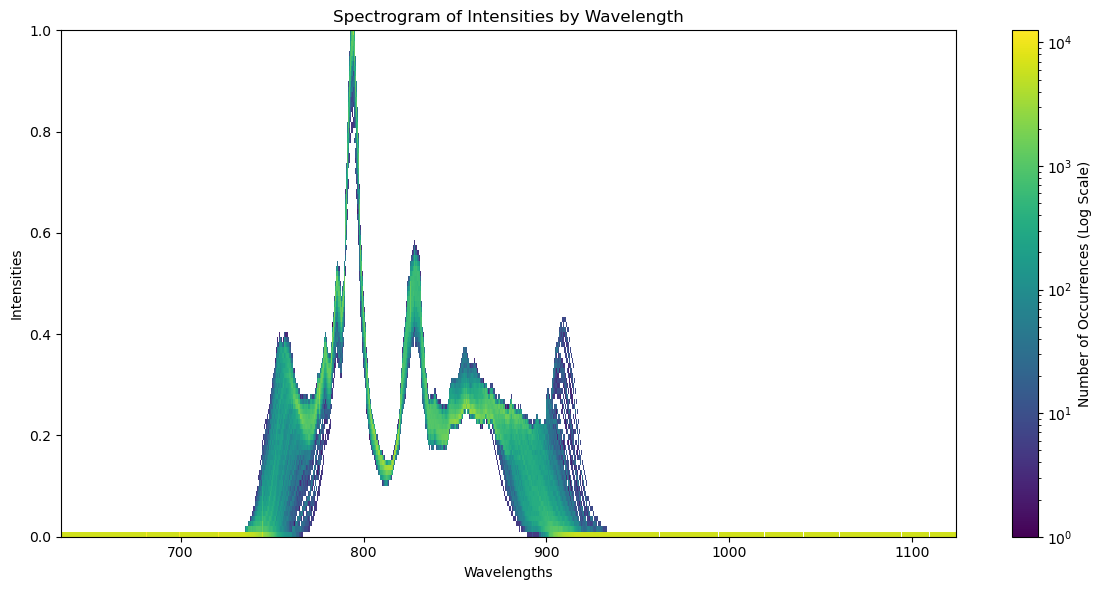

In [8]:
create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength")

## Create mask of zero ends

In [7]:
processed_intensities = train_df['intensities'].apply(lambda x: np.array(list(map(float, x.split(',')))))

intensity_matrix = np.vstack(processed_intensities)

mask = (intensity_matrix <= 0.005).all(axis=0)

#np.save('data/wavelengths_mask.npy', mask)

## Check the cuts

In [9]:
def cut_zero_ends(df):
    wavelengths = np.load('data/wavelengths.npy')
    mask = np.load('data/wavelengths_mask.npy')
    
    filtered_wavelengths = wavelengths[~mask]
    df['intensities'] = df['intensities'].apply(
        lambda x: np.array(list(map(float, x.split(','))))[~mask].tolist()
    )
    return df

In [10]:
filtered_wavelengths = wavelengths[~mask]

filtered_intensities = cut_zero_ends(train_df)['intensities']

In [11]:
create_spectrogram(filtered_wavelengths, filtered_intensities, label="Spectrogram of Intensities by Wavelength")

ValueError: x and y must have the same length.

In [13]:
len(filtered_wavelengths)

427